In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# sys.executable

In [ ]:
# import sys
# path = '/home/ubuntu/anaconda3/bin/python'
# sys.path.insert(0, path)
# sys.path

In [2]:
from fastai import *
from fastai.vision import *

In [ ]:
# ! which python

In [ ]:
# sys.path

In [ ]:
# import sys
# sys.executable

In [ ]:
# folder = 'apples'
# file = 'url_apples.txt'

In [ ]:
# folder = 'oranges'
# file = 'url_oranges.txt'

In [3]:
path = Path('data/fruit')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [4]:
classes = ['apples', 'oranges']

In [ ]:
# download_images(path/file, dest, max_pics=200)

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

apples


Process ForkProcess-3:
Process ForkProcess-2:
Process ForkProcess-1:


Process ForkProcess-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process ForkProcess-5:
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Process ForkProcess-8:
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkProcess-7:
Process ForkProcess-6:
  File "/home/ubuntu/anaconda3/envs/fas

oranges


Process ForkProcess-9:
Process ForkProcess-10:
Process ForkProcess-13:
Process ForkProcess-12:
Traceback (most recent call last):
Process ForkProcess-14:
Traceback (most recent call last):
Process ForkProcess-15:
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkProcess-11:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-16:
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/

In [6]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['apples', 'oranges']

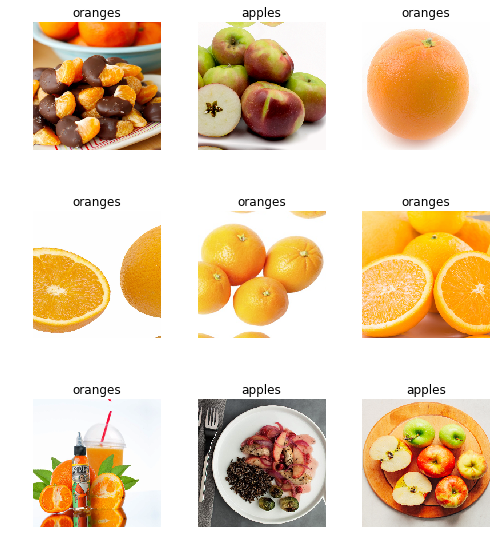

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apples', 'oranges'], 2, 305, 76)

In [10]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

Total time: 01:19
epoch  train_loss  valid_loss  error_rate
1      0.806206    0.263588    0.105263    (00:21)
2      0.532587    0.081028    0.026316    (00:18)
3      0.359741    0.061631    0.039474    (00:20)
4      0.274346    0.067396    0.026316    (00:19)



In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


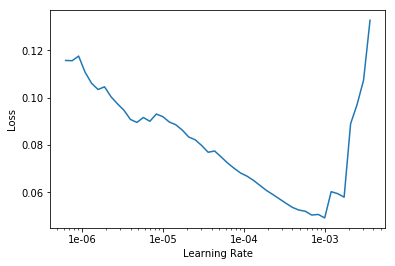

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

Total time: 00:38
epoch  train_loss  valid_loss  error_rate
1      0.221143    0.360646    0.065789    (00:18)
2      0.210526    0.212345    0.052632    (00:19)



In [18]:
learn.save('stage-2')

In [19]:
learn.load('stage-2');

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

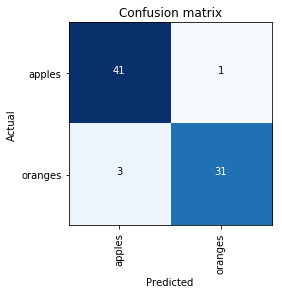

In [22]:
interp.plot_confusion_matrix()